# stackoverflow_survey_analysis

In this jupyter notebook the analysis of the Stack Overflow survey from 2020 and 2024 is presented.   
For the analysis, the [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process is used.

The [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) process consists of the following steps:    
1. Business Understanding
2. Data Understandung
3. Data Preparation
4. Data Modeling
5. Result Evaluation
6. Deployment

## 1. Business Understanding
The main objective of this analysis is to get used to the data science process according to [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining) taught during the [Udacity - Data Scientist](https://www.udacity.com/enrollment/nd025) Course and to apply the acquired knowledge to a real-world problem.

To achieve this, the analysis will use the [Stack Overflow surveys from 2020 and 2024](https://survey.stackoverflow.co/) to address the following three questions:

**When comparing the results from 2020 to 2024 ...**  

- **Question 1: ... did the difficulty of the survey increase over the past four years?**
  - *Relevance*: Understanding changes in survey difficulty over time can help to ensure that any observed trends or patterns in the results are not due to changes in survey complexity.

- **Question 2: ... did the past four years change the general job statisfaction?**   
  - *Relevance*: Analyzing shifts in job satisfaction over time can provide insights into the impact of external factors such as economic conditions or general changes in working conditions.

- **Question 3: ... did the past four years change job compensation?**   
  - *Relevance*: Examining changes in job compensation over the past four years helps to see trends in salary growth, inflation adjustments, and how economic factors or industry shifts may have influenced compensation practices.




## 2. Data understanding

This chapter describes the steps taken to understand the provided data by the Stack Overflow surveys from 2020 and 2024

### 2.1 Import packages and load dataframes

First, we import the relevant packages for the analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Then we import the relevant survays into our workspace

In [7]:
df_20 = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_public.csv')
df_20_schema = pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_schema.csv')
df_24 = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_public.csv')
df_24_schema = pd.read_csv('./data/stack-overflow-developer-survey-2024/survey_results_schema.csv')

Now, lets take a look at the head of the 2020 and 2024 survey

In [8]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [9]:
df_24.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### 2.2 Find common colums relevant for solving the questions

Lets find the coloums which are available in both datafields and which can be used to solve the three questions:    
**When comparing the results from 2020 to 2024 ...**  
- **Question 1: ... did the difficulty of the survey increase over the past four years?**
- **Question 2: ... did the past four years change the general job statisfaction?**   
- **Question 3: ... did the past four years change job compensation?**

In [10]:
common_columns = df_24.columns.intersection(df_20.columns) # find the common columns in bot datafields
common_columns_list = common_columns.tolist()
common_columns_list

['MainBranch',
 'Age',
 'Employment',
 'EdLevel',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'Country',
 'CompTotal',
 'NEWSOSites',
 'SOVisitFreq',
 'SOAccount',
 'SOPartFreq',
 'SOComm',
 'SurveyLength',
 'SurveyEase',
 'JobSat']

The description of each column can be found in the schema file:

In [11]:
pd.set_option('display.max_colwidth', None) # do not limit output
loc_column = common_columns_list
for loc_column in common_columns_list:
    # Print the question text from df_20_schema
    print(f"df_20_schema: Question text for '{loc_column}'")
    print(df_20_schema[df_20_schema['Column'] == loc_column]['QuestionText'].to_string(index=False))

    # Print the question text from df_24_schema
    print(f"df_24_schema: Question text for '{loc_column}'")
    print(df_24_schema[df_24_schema['qname'] == loc_column]['question'].to_string(index=False))
    
    print("\n" + "-"*50 + "\n")  # Separator between different columns for better readability
pd.reset_option('display.max_colwidth')

df_20_schema: Question text for 'MainBranch'
Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
df_24_schema: Question text for 'MainBranch'
Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".*

--------------------------------------------------

df_20_schema: Question text for 'Age'
What is your age (in years)? If you prefer not to answer, you may leave this question blank.
df_24_schema: Question text for 'Age'
What is your age?*

--------------------------------------------------

df_20_schema: Question text for 'Employment'
Which of the following best describes your current employment status?
df_24_schema: Question text for 'Employment'
Which of the following best describes your current employment status? Select all that apply.*

--------------------------------------------------

df_20_schema: Question text for 'EdLevel'
Which of the following

Regarding the questions the following columns of both datafields seem fitting for the analysis:

In [12]:
common_columns_analysis = ['SurveyEase', 'JobSat','CompTotal']

Lets have a short look at the content of the common columns

In [13]:
df_20[common_columns_analysis] # survey from 2020

,SurveyEase,JobSat,CompTotal
0,Neither easy nor difficult,Slightly satisfied,NaN
1,NaN,Very dissatisfied,NaN
2,Neither easy nor difficult,NaN,NaN
3,NaN,Slightly dissatisfied,NaN
4,Easy,NaN,NaN
...,...,...,...
64456,NaN,NaN,NaN
64457,NaN,NaN,NaN
64458,NaN,NaN,NaN
64459,NaN,NaN,NaN


In [14]:
df_24[common_columns_analysis]  # survey from 2024

,SurveyEase,JobSat,CompTotal
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Easy,NaN,NaN
3,Easy,NaN,NaN
4,Easy,NaN,NaN
...,...,...,...
65432,NaN,NaN,NaN
65433,NaN,NaN,NaN
65434,NaN,NaN,NaN
65435,NaN,NaN,NaN


Since there seem to be a lot of NaN's, let's count them down for the selected colums.

In [15]:
df_20_nan_count_per_row_perc = (df_20[common_columns_analysis].isna().sum() / df_20[common_columns_analysis].shape[0])*100
df_24_nan_count_per_row_perc = (df_24[common_columns_analysis].isna().sum() / df_24[common_columns_analysis].shape[0])*100
print(f"2020 survey: NaN values in %:\n{df_20_nan_count_per_row_perc.round(1)}\n") # print 2020's Percentage of NaN's
print(f"2024 survey: NaN values in %:\n{df_24_nan_count_per_row_perc.round(1)}\n") # print 2024's Percentage of NaN's

2020 survey: NaN values in %:
SurveyEase    19.6
JobSat        29.9
CompTotal     46.0
dtype: float64

2024 survey: NaN values in %:
SurveyEase    14.1
JobSat        55.5
CompTotal     48.4
dtype: float64



Furthermore, the possibilites to answer were different in 2020 and 2024.
- This can be seen in the addtach *.pdf files which desribe each survey (so_survey_2020.pdf and 2024 Developer Survey.pdf). 0
    - e.g. for the column 'CompTotal'. In 2020 it was possible to enter the values weekly, monthly OR yearly (defined in column ["CompFreq"]).In 2024 this was only yearly.

In [16]:
pd.set_option('display.max_colwidth', None) # do not limit output
# Get unique values for each column
df_20_unique_values = df_20[common_columns_analysis].apply(lambda x: set(x.unique()))
df_24_unique_values = df_24[common_columns_analysis].apply(lambda x: set(x.unique()))
# Display the result
print(f"unique values of 2020 survey: '{df_20_unique_values}'")
print("-------------------------------")
print(f"unique values of 2024 survey: '{df_20_unique_values}'")
pd.reset_option('display.max_colwidth')

unique values of 2020 survey: 'SurveyEase                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     {Easy, nan, Neither easy nor difficult, Difficult}
JobSat                                                                                                                                                                                 

### 2.3 Summary of Findings during Data understanding

During the Data Understanding step, the following points stood out:

- There are over 60.000 respondents within each dataset (2020: 64.461, 2021: 65.437)
- The columns `['SurveyEase', 'JobSat','CompTotal']` seem promising to solve the questions listed in 1. Business Understanding
- There are a lot of NaN values within the survey
- In the 2020 survey the column 'CompTotal' could be answered either weekly, monthly or yearly. In 2024 it was only yearly.

This means: before working with the data, we need to prepare the data for the analysis

## 3. Data preparation

### 3.1 Data preparation for Question 1 and Question 2

To start the analysis, the first question was: ...
- When comparing the results from 2020 to 2024 did the difficulty of the survey increase over the past four years?

First, lets count how much and what usable data is available:

In [36]:
print(f"2020 survey:")
print(f"unique values: {(df_20['SurveyEase'].unique())}")
print(f"Not NaN values: {(df_20['SurveyEase'].shape[0] - df_20['SurveyEase'].isna().sum()).round(1)}")
print(f"(this results in usable data in %: {(100-df_20_nan_count_per_row_perc["SurveyEase"]).round(1)})")
print("\n ------------------------------ \n")
print(f"2024 survey:")
print(f"unique values: {(df_24['SurveyEase'].unique())}")
print(f"Not NaN values: {(df_24['SurveyEase'].shape[0] - df_24['SurveyEase'].isna().sum()).round(1)}")
print(f"(this results in usable data in %: {(100-df_24_nan_count_per_row_perc["SurveyEase"]).round(1)})")

2020 survey:
unique values: ['Neither easy nor difficult' nan 'Easy' 'Difficult']
Not NaN values: 51802
(this results in usable data in %: 80.4)

 ------------------------------ 

2024 survey:
unique values: [nan 'Easy' 'Neither easy nor difficult' 'Difficult']
Not NaN values: 56238
(this results in usable data in %: 85.9)


The responses for both years include [nan, 'Easy', 'Neither easy nor difficult', 'Difficult'], which is helpful for the analysis. However, there are some missing values (19.6% in 2020 and 14.1% in 2024).

There are different methods to handle missing values, each with its advantages and disadvantages:

Removing missing values
Imputing missing values
Removing missing values is straightforward and avoids introducing bias, but it can lead to information loss and potential bias if the missing data isn't random. Imputing missing values retains the dataset's size and variability but may introduce bias, adds complexity, and can potentially lead to model overfitting.

To address the first question, the "Removing missing values" option was chosen because, even after removal, there is still sufficient data available. Additionally, to ensure an unaltered analysis, I wanted to directly compare the responses from both years (excluding NaN values), as they align well due to the identical response options.

Lets create the datafields to answer Question 1:

In [49]:
df20_q1_cleaned = df_20['SurveyEase'].dropna()
df24_q1_cleaned = df_24['SurveyEase'].dropna()
print(df20_q1_cleaned.isna().sum()) # number of nan values (should be 0!)
print(df24_q1_cleaned.isna().sum()) # number of nan values (should be 0!)

0
0


Lets create the datafields to answer Question 2:

### 3.1 Data preparation for Question 3

adding yearly compensation to df20

In [50]:
df_20["YearlyCompensation"] = np.where(df_20["CompFreq"] == "weekly", df_20["CompTotal"] * 52,
                                       np.where(df_20["CompFreq"] == "monthly", df_20["CompTotal"] * 12,
                                                df_20["CompTotal"]))
df_20["YearlyCompensation"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
64456   NaN
64457   NaN
64458   NaN
64459   NaN
64460   NaN
Name: YearlyCompensation, Length: 64461, dtype: float64

## 4. Data modeling

## 5. Evaluation

### 5.1 Question 1

<Figure size 1000x600 with 0 Axes>

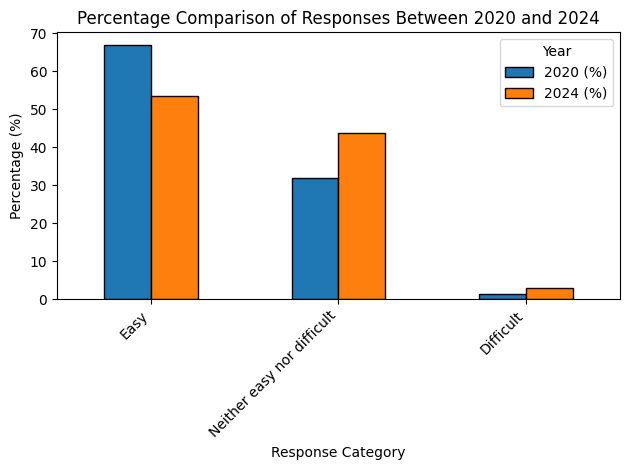

,2020 (%),2024 (%)
SurveyEase,,
Easy,66.84,53.47
Neither easy nor difficult,31.81,43.71
Difficult,1.35,2.82


In [54]:
# Calculate percentage for each category in 2020 and in 2024
df20_q1_percentage = (df20_q1_cleaned.value_counts(normalize=True) * 100).round(2)
df24_q1_percentage = (df24_q1_cleaned.value_counts(normalize=True) * 100).round(2)

# Creating DataFrame to compare the percentages between 2020 and 2024
q1_comparison_df = pd.DataFrame({
    '2020 (%)': df20_q1_percentage,
    '2024 (%)': df24_q1_percentage
})

# Plotting the comparison
plt.figure(figsize=(10, 6))
q1_comparison_df.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Percentage Comparison of Responses Between 2020 and 2024')
plt.xlabel('Response Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Display the comparison DataFrame
q1_comparison_df